# Лабораторная работа 6. Прогнозирование оценок показателей надёжности


Вариант 12

Лазарев Эдуард Артемович
N33471

Доверительный интервал для эмпирических значений T
T*	T*н	T*в
533	513	413
1015	1160	923
1538	1862	1476


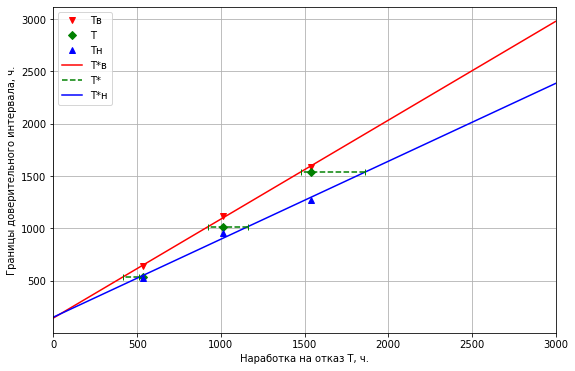

<Figure size 432x288 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Исходные данные - наработка на отказ и границы доверительного интервала
T = np.array([533, 1015, 1538])
Tn = np.array([521, 957, 1272])
Tv = np.array([639, 1115, 1590])
mx = 3000
sz = T.size

# Расчет математических ожиданий выборок
m = T.mean()
mv = Tv.mean()
mn = Tn.mean()

# Расчет коэффициентов корреляции и дисперсии
Kv = sum(T * Tv) / sz - m * mv
Kn = sum(T * Tn) / sz - m * mn
D = sum(T * T) / sz - m**2

# Расчет коэффициентов линейных функций
av = Kv / D
an = Kn / D
bv = mv - av * m
bn = mn - an * m

# Расчет линейных трендов границ доверительного интервала
t = np.arange(mx)
tn = an * t + bn
tv = av * t + bv

# Пересчет границ доверительных интервалов для исходных точек
Tnr = (T - bn) / an
Tvr = (T - bv) / av

fig = plt.figure(figsize=(9,6))

# Отметка исходных точек и границ интервалов
plt.plot(T, Tv, 'rv')
plt.plot(T, T, 'gD')
plt.plot(T, Tn, 'b^')

# Построение графика линейных зависимостей
plt.plot(t, tv, 'r')
plt.axhline(y=T[0], xmin=Tnr[0] / mx, xmax=Tvr[0] / mx, linestyle='--', c='g')
plt.plot(t, tn, 'b')

# Построение пересчитанных доверительных интервалов
for i in range(1,sz):
  plt.axhline(y=T[i], xmin=Tnr[i] / mx, xmax=Tvr[i] / mx, linestyle='--', c='g')

for i in range(sz):
  plt.plot(Tnr[i], T[i], 'g|')
  plt.plot(Tvr[i], T[i], 'g|')

plt.xlabel('Наработка на отказ T, ч.')
plt.ylabel('Границы доверительного интервала, ч.')
plt.legend(['Tв', 'T', 'Tн', 'T*в', 'T*', 'T*н'])

# Вывод таблицы с результатами
print('Доверительный интервал для эмпирических значений T')

print('T*', 'T*н', 'T*в', sep='\t')
for i in range(sz):
  print(T[i], int(Tnr[i]), int(Tvr[i]), sep='\t')

plt.xlim(0, mx)
plt.grid()
plt.show()
plt.savefig(f"images/линейные тренды оценок.png")